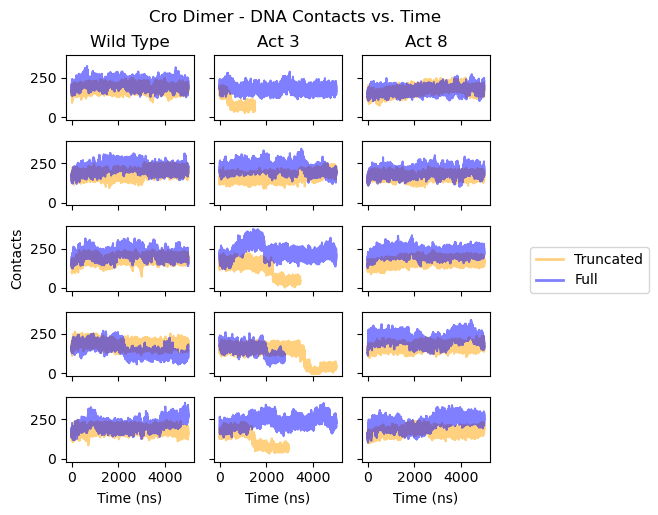

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

WT = {}
WTr = {}
A3 = {}
T3 = {}
A8 = {}
T8 = {}

# Load data
systems1 = [('WTr', WTr), ('T3', T3), ('T8', T8)]
systems2 = [('WT', WT), ('A3', A3), ('A8', A8)]

for name, system in systems1:
    for i in range(1, 6):
        filename = f'{name}dna_cro{i}.dat'
        system[str(i)] = np.loadtxt(filename, unpack=True, usecols=(1,), comments='#')

for name, system in systems2:
    for i in range(1, 6):
        filename = f'{name}cro_dna{i}.dat'
        system[str(i)] = np.loadtxt(filename, unpack=True, usecols=(1,), comments='#')

# Plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(6, 5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

system_labels = ['Wild Type', 'Act 3', 'Act 8']

for col, (name2, full_sys) in enumerate(systems2):
    name1, trunc_sys = systems1[col]  # Assuming same order
    for row in range(5):  # Replicates 1–5
        ax = axes[row, col]
        rep = str(row + 1)

        # Convert steps to ns: 1 step = 0.1 ns
        time_full = np.arange(len(full_sys[rep])) * 0.1
        time_trunc = np.arange(len(trunc_sys[rep])) * 0.1

        ax.plot(time_trunc, trunc_sys[rep], label='Truncated', color='orange', alpha=0.5)
        ax.plot(time_full, full_sys[rep], label='Full', color='blue', alpha=0.5)

        if row == 0:
            ax.set_title(system_labels[col])
        if col == 0 and row == 2:
            ax.set_ylabel(f'Contacts')

        if row == 4:
            ax.set_xlabel('Time (ns)')

legend_elements = [
    Line2D([0], [0], color='orange', lw=2, alpha=0.5, label='Truncated'),
    Line2D([0], [0], color='blue', lw=2, alpha=0.5, label='Full')
]

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Shrink plot area to leave space on right
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.88, 0.5))

# Title and save
plt.suptitle('Cro Dimer - DNA Contacts vs. Time', y=1.02)
plt.savefig('dimer-vs-dna-contacts.pdf', bbox_inches='tight')

